## Dicionário das colunas e dos dados:

Dados históricos da Ibovespa (BVSP), retidados do site [https://br.investing.com](https://br.investing.com/indices/bovespa-historical-data)**, considerando dados diários de cotações em um período entre **27/12/2020 à 22/08/2023**.
> *Data da Consulta: 22/08/2023*


*  **Data**: A data em que a negociação ocorreu.
*  **Abertura**: O preço pelo qual um ativo começou a ser negociado no dia em questão.
*  **Mínimo**: O menor preço atingido pelo ativo durante o dia de negociação.
*  **Máximo**: O preço mais alto atingido pelo ativo durante o dia de negociação.
*  **Volume** (Vol.): A quantidade total de ações (ou contratos) negociados durante o dia. Indica o interesse e a atividade dos investidores.
*  **Variação** (Var%): A diferença entre o preço de fechamento do dia atual e o preço de fechamento do dia anterior, geralmente expressa em porcentagem. Ela mostra a mudança no valor do ativo de um dia para o outro.



## Objetivos:

> Criar um modelo preditivo com dados da IBOVESPA (Bolsa de valores) para criar uma série temporal e prever diariamente o fechamento da base.

> Acurácia do modelo acima de 70%

## Importação das bases e primeiras análises dos dados

In [ ]:
# importanto as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date, time, datetime, timedelta

from google.colab import drive # importar módulo do drive e upar base de dados pelo diretório
drive.mount('drive')

Mounted at drive


In [341]:
ibovespa_diario = pd.read_csv("drive/My Drive/Pos Tech Base de Dados/Tech Challenge Fase 2/Base de Dados/dados_ibovespa_dez00-ago23.csv", sep=",", parse_dates=[0], index_col="Data",dayfirst=True) # definição da coluna Data como index
ibovespa_diario.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2019-12-30,115.645,116.530,117.086,115.599,"3,67M","-0,76%"
2019-12-27,116.534,117.205,117.803,115.995,"3,91M","-0,57%"
2019-12-26,117.203,115.864,117.220,115.673,"3,79M","1,16%"
2019-12-23,115.863,115.119,115.863,114.964,"4,00M","0,64%"
2019-12-20,115.121,115.133,115.171,114.526,"6,89M","-0,01%"


In [ ]:
# ibovespa_diario = pd.read_csv("drive/My Drive/Pos Tech Base de Dados/Tech Challenge Fase 2/Base de Dados/dados_ibovespa_dez00-ago23.csv", sep=",")
# ibovespa_diario

In [342]:
ibovespa_diario.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5611 entries, 2019-12-30 to 2020-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    5611 non-null   float64
 1   Abertura  5611 non-null   float64
 2   Máxima    5611 non-null   float64
 3   Mínima    5611 non-null   float64
 4   Vol.      5610 non-null   object 
 5   Var%      5611 non-null   object 
dtypes: float64(4), object(2)
memory usage: 306.9+ KB


In [343]:
ibovespa_diario.index.min()

Timestamp('2000-12-27 00:00:00')

In [344]:
ibovespa_diario.index.max()

Timestamp('2023-08-22 00:00:00')

In [345]:
total = ibovespa_diario.shape[0]
print("Total de dados na base: ", total)

Total de dados na base:  5611


In [346]:
ibovespa_diario.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5611 entries, 2019-12-30 to 2020-01-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    5611 non-null   float64
 1   Abertura  5611 non-null   float64
 2   Máxima    5611 non-null   float64
 3   Mínima    5611 non-null   float64
 4   Vol.      5610 non-null   object 
 5   Var%      5611 non-null   object 
dtypes: float64(4), object(2)
memory usage: 306.9+ KB


Necessário realizar alguns pré-processamentos nos dados:
* Colunas "Último","Abertura", "Máxima", "Mínima": Ajustar casa decimal (valor em milhar) e alterar o type para int.

* Vol: retirar caracteres "K" e "M" e tratar valores

* Var%: Retirar caracter "%".

## Tratamento e pré-processamento de dados da base

In [ ]:
# cols_int = ["Último","Abertura", "Máxima", "Mínima"]

# for column in cols_int:
#     ibovespa_diario[column] = (ibovespa_diario[column] * 1000).astype(int)
#     # ibovespa_diario[column] = ibovespa_diario[column].astype(int)

# ibovespa_diario.head()

In [347]:
# função para retirar caracteres não numericos da coluna Volume
def convert_volume(vol):
    if isinstance(vol, str):
        if 'M' in vol:
            return float(vol.replace('M', '')) * 1000000
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1000
    return vol

ibovespa_diario = ibovespa_diario.replace(",",".", regex = True) # Tudo que é vírgula vira ponto
ibovespa_diario['Var%'] = ibovespa_diario['Var%'].replace("%"," ", regex = True).astype(float) # Tudo que é vírgula vira ponto
ibovespa_diario['Vol.'] = ibovespa_diario['Vol.'].apply(convert_volume)
ibovespa_diario['Vol.'] = round(ibovespa_diario['Vol.'].astype(float))
ibovespa_diario.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2019-12-30,115.645,116.530,117.086,115.599,3670000.0,-0.76
2019-12-27,116.534,117.205,117.803,115.995,3910000.0,-0.57
2019-12-26,117.203,115.864,117.220,115.673,3790000.0,1.16
2019-12-23,115.863,115.119,115.863,114.964,4000000.0,0.64
2019-12-20,115.121,115.133,115.171,114.526,6890000.0,-0.01


In [348]:
ibovespa_diario.dtypes

Último      float64
Abertura    float64
Máxima      float64
Mínima      float64
Vol.        float64
Var%        float64
dtype: object

> Tratamento das colunas realizada, com exceção da coluna Vol. que ainda está em float. Ao fazer a transformação, ocorreu um erro sinalizando que existe um dado nulo nesta coluna.

## Identificação de dados nulos ou duplicados

In [349]:
val_duplicated = ibovespa_diario.duplicated().sum()

print("Validação de dados duplicados:")
if val_duplicated > 0:
  print(f"\tExistem valores duplicados na base, é necessário investigar.")
else:
  print(f"\tNão esxistem valores duplicados na base")

Validação de dados duplicados:
	Não esxistem valores duplicados na base


In [350]:
percent_nulos = 100*((ibovespa_diario.isnull().sum())/(len(ibovespa_diario))) # avaliação de dados nulos
print(percent_nulos)

Último      0.000000
Abertura    0.000000
Máxima      0.000000
Mínima      0.000000
Vol.        0.017822
Var%        0.000000
dtype: float64


Existem valores nulos na coluna Vol.

In [351]:
ibovespa_diario.loc[ibovespa_diario['Vol.'].isnull()]

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2016-02-10,40.377,40.592,40.592,39.96,NaN,-0.53


In [352]:
ibovespa_diario['Vol.'] = ibovespa_diario['Vol.'].fillna(value = 0) # alterando o valor nulo por 0
ibovespa_diario['Vol.'] = ibovespa_diario['Vol.'].astype(int) # transformação do tipo para inteiro
ibovespa_diario.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2019-12-30,115.645,116.530,117.086,115.599,3670000,-0.76
2019-12-27,116.534,117.205,117.803,115.995,3910000,-0.57
2019-12-26,117.203,115.864,117.220,115.673,3790000,1.16
2019-12-23,115.863,115.119,115.863,114.964,4000000,0.64
2019-12-20,115.121,115.133,115.171,114.526,6890000,-0.01


In [353]:
def obter_dia_da_semana(data_index):
    try:
        data = datetime.strptime(data_index, '%d/%m/%Y')
        dias_da_semana = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
        dia_da_semana = dias_da_semana[data.weekday()]
        return dia_da_semana
    except ValueError:
        return "Data inválida"

ibovespa_diario['Dia_da_Semana'] = ibovespa_diario.index.map(lambda x: obter_dia_da_semana(x.strftime('%d/%m/%Y')))

In [354]:
ibovespa_diario.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Dia_da_Semana
Data,,,,,,,
2019-12-30,115.645,116.530,117.086,115.599,3670000,-0.76,Segunda-feira
2019-12-27,116.534,117.205,117.803,115.995,3910000,-0.57,Sexta-feira
2019-12-26,117.203,115.864,117.220,115.673,3790000,1.16,Quinta-feira
2019-12-23,115.863,115.119,115.863,114.964,4000000,0.64,Segunda-feira
2019-12-20,115.121,115.133,115.171,114.526,6890000,-0.01,Sexta-feira


## EDA e primeiras inferências

In [355]:
ibovespa_diario.describe().round(2)

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,5611.00,5611.00,5611.00,5611.00,5.611000e+03,5611.00
mean,58.87,58.85,59.45,58.26,6.689736e+07,0.05
std,31.07,31.07,31.31,30.81,1.170886e+08,1.75
min,8.37,8.40,8.51,8.22,0.000000e+00,-14.78
25%,37.44,37.41,37.98,36.86,3.010000e+06,-0.88
50%,56.44,56.44,56.97,55.90,5.380000e+06,0.07
75%,74.46,74.42,75.14,73.79,9.910000e+07,1.03
max,130.78,130.78,131.19,129.53,9.949600e+08,14.66


**Inferências iniciais:**

* As médias dos preços das ações não tende a oscilar muito, ao longo do tempo, mas tem uma distanciação em relação à mediana.
* No histórico, há uma média de variação positiva entre os dias.

In [356]:
ibovespa_diario.groupby("Dia_da_Semana")["Último"].describe().round(2).T # avaliação das estatísticas por dia da semana

Dia_da_Semana,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Terça-feira
count,1142.00,1122.00,1119.00,1110.00,1118.00
mean,58.92,59.01,58.80,58.78,58.84
std,31.03,31.18,31.13,31.09,30.98
min,8.37,8.87,8.45,8.72,8.51
25%,37.70,37.50,37.24,37.34,37.41
50%,56.46,56.79,56.49,56.49,56.24
75%,74.78,74.68,74.32,73.80,74.32
max,129.91,130.08,130.78,130.13,130.09


In [357]:
dados_dia = ibovespa_diario.groupby("Dia_da_Semana")["Último"].nunique()
dados_dia.sort_values(ascending=True, inplace=True)
dados_dia

Dia_da_Semana
Sexta-feira      1103
Segunda-feira    1111
Terça-feira      1111
Quinta-feira     1119
Quarta-feira     1139
Name: Último, dtype: int64

In [ ]:
# dados_dia_2 = ibovespa_diario.loc[ibovespa_diario.index.year > 2010]
# dados_dia_2 = dados_dia_2.groupby("Dia_da_Semana")["Último"].nunique()
# dados_dia_2.sort_values(ascending=True, inplace=True)
# dados_dia_2

In [ ]:
# sns.barplot(x=dados_dia_2.index, y=dados_dia_2.values)
# plt.tight_layout()

## Avaliação das Distribuições

Visão considerando toda série histórica (2000 a 2023)

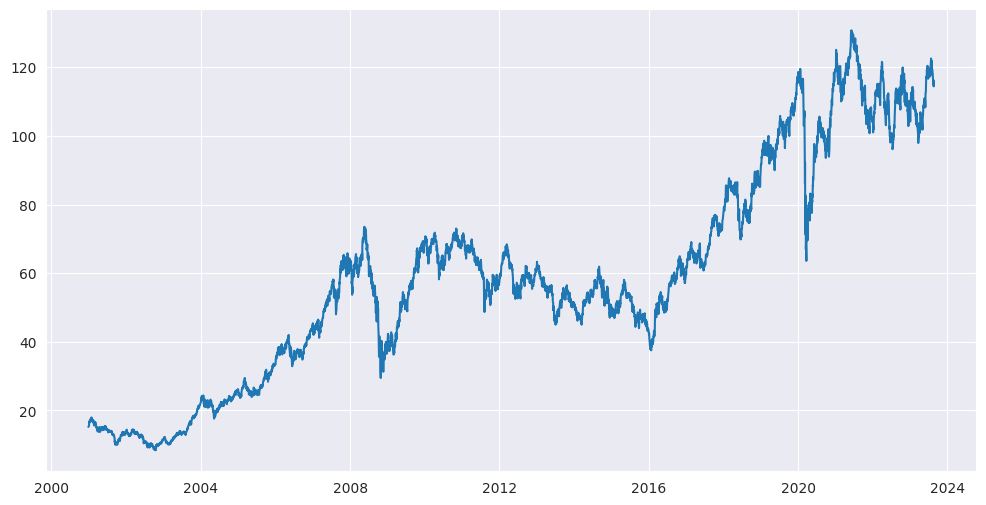

In [358]:
ibovespa_diario = ibovespa_diario.sort_index()

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(ibovespa_diario.index, ibovespa_diario.Último)
plt.show()

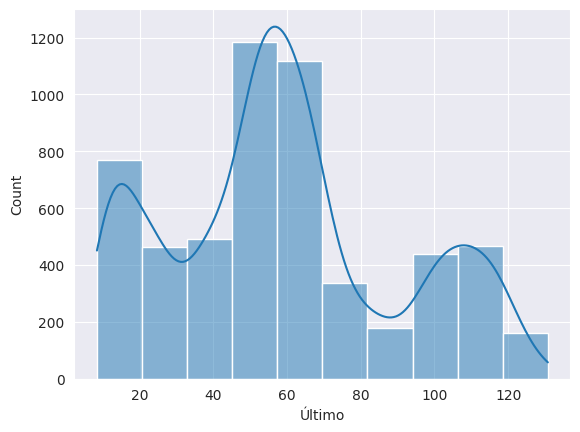

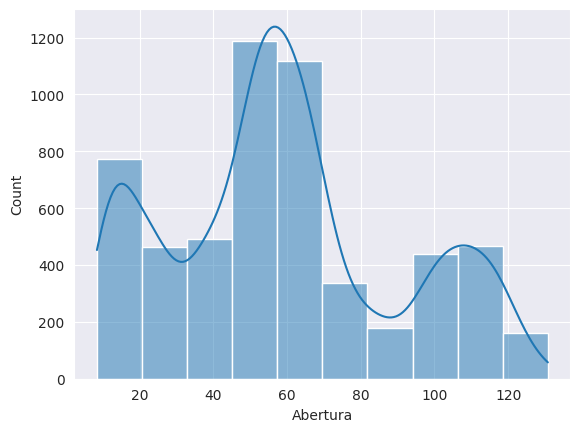

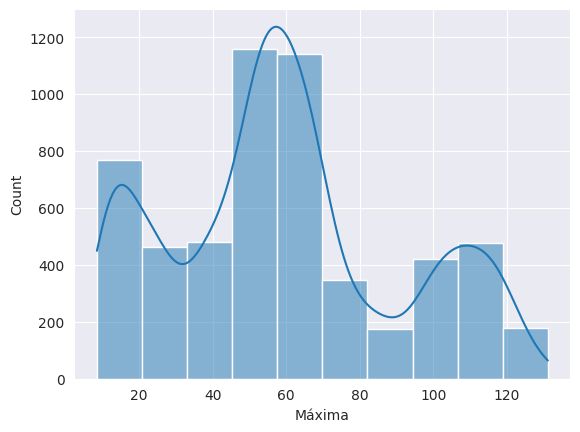

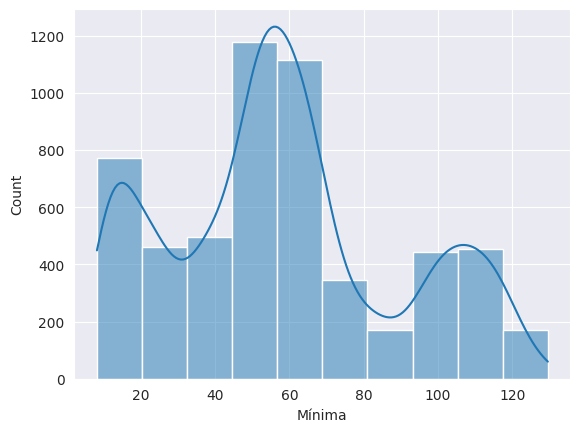

In [359]:
colunas_numericas_preco = ["Último", "Abertura", "Máxima", "Mínima"]
for column in colunas_numericas_preco:
    plt.figure()
    plot = ibovespa_diario[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

Podemos ver que distribuiçao dos dados de valores ao longo seguem um comportamento similar.

<ipython-input-360-e3f7f1958548>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

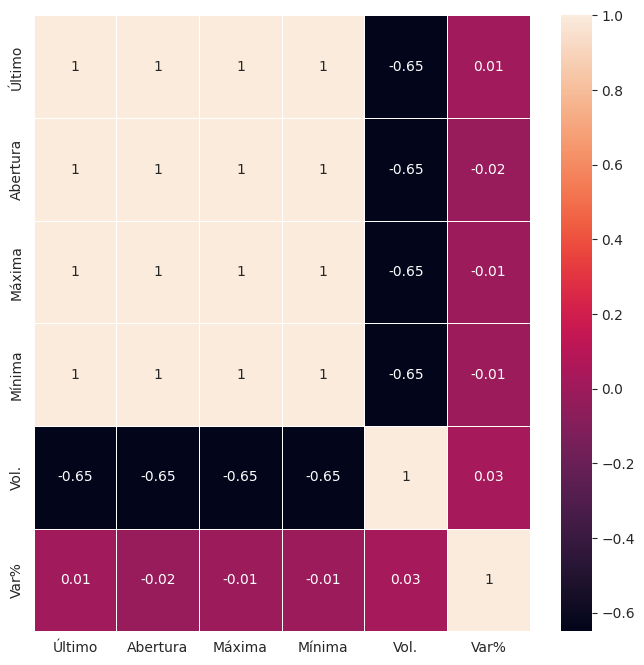

In [360]:
correlation_matrix = ibovespa_diario.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Filtro de datas a partir de 2010

In [361]:
ibovespa_pos_2010 = ibovespa_diario.loc[ibovespa_diario.index.year > 2010]
ibovespa_pos_2010.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Dia_da_Semana
Data,,,,,,,
2011-01-03,69.962,69.310,70.471,69.305,1860000,0.95,Segunda-feira
2011-01-04,70.318,69.962,70.318,69.560,2430000,0.51,Terça-feira
2011-01-05,71.091,70.311,71.173,69.802,2310000,1.10,Quarta-feira
2011-01-06,70.579,71.093,71.167,70.469,2550000,-0.72,Quinta-feira
2011-01-07,70.057,70.580,70.783,69.718,1760000,-0.74,Sexta-feira


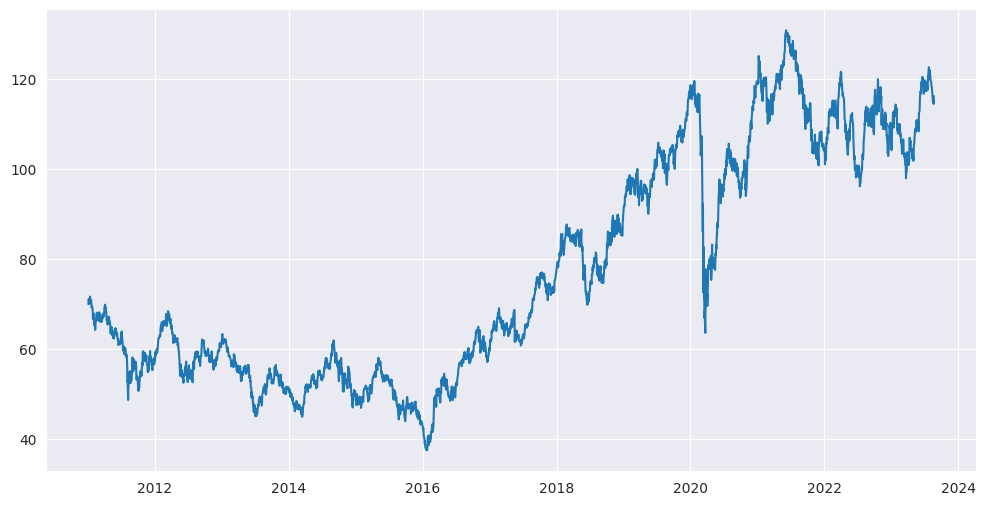

In [362]:
ibovespa_pos_2010 = ibovespa_pos_2010.sort_index()
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(ibovespa_pos_2010.index, ibovespa_pos_2010.Último)
plt.show()

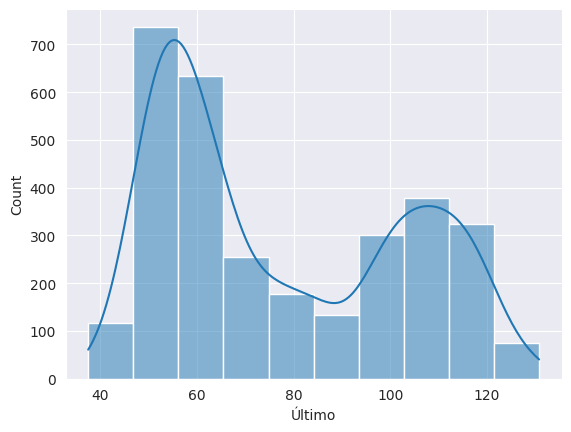

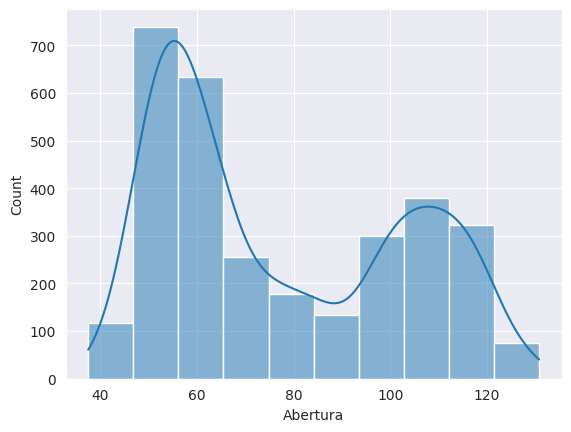

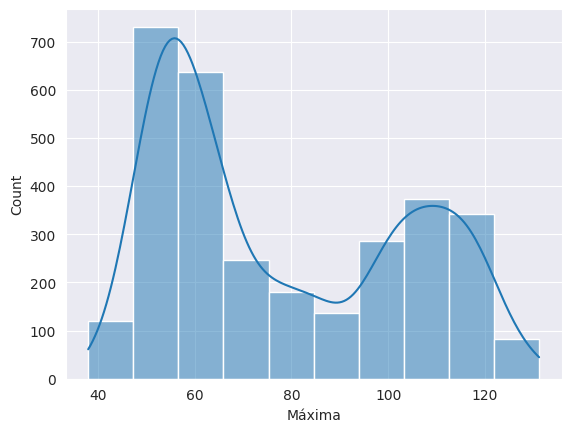

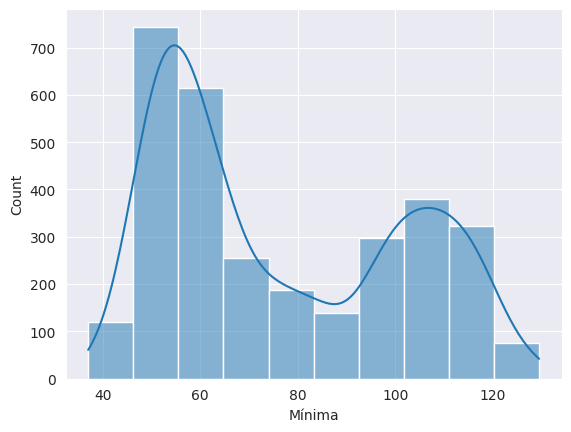

In [363]:
colunas_numericas_preco = ["Último", "Abertura", "Máxima", "Mínima"]
for column in colunas_numericas_preco:
    plt.figure()
    plot = ibovespa_pos_2010[column]
    sns.histplot(plot, bins=10, kde=True)
    plt.show()

## Análises temporais

> O **preço de fechamento** reflete o valor final pelo qual o ativo foi negociado durante o dia e é frequentemente usado como um indicador-chave para análise de séries temporais.

* ds = ibovespa_diario.index
* y = ibovespa_diario["Último]
* ticker = ibovespa

In [364]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

### Ajustando colunas para análise do seasonal comporse

In [365]:
dados_decompose = ibovespa_pos_2010[['Último']]
dados_decompose = dados_decompose.dropna()
dados_decompose = dados_decompose.sort_index()

In [366]:
resultados = seasonal_decompose(dados_decompose, period=5)

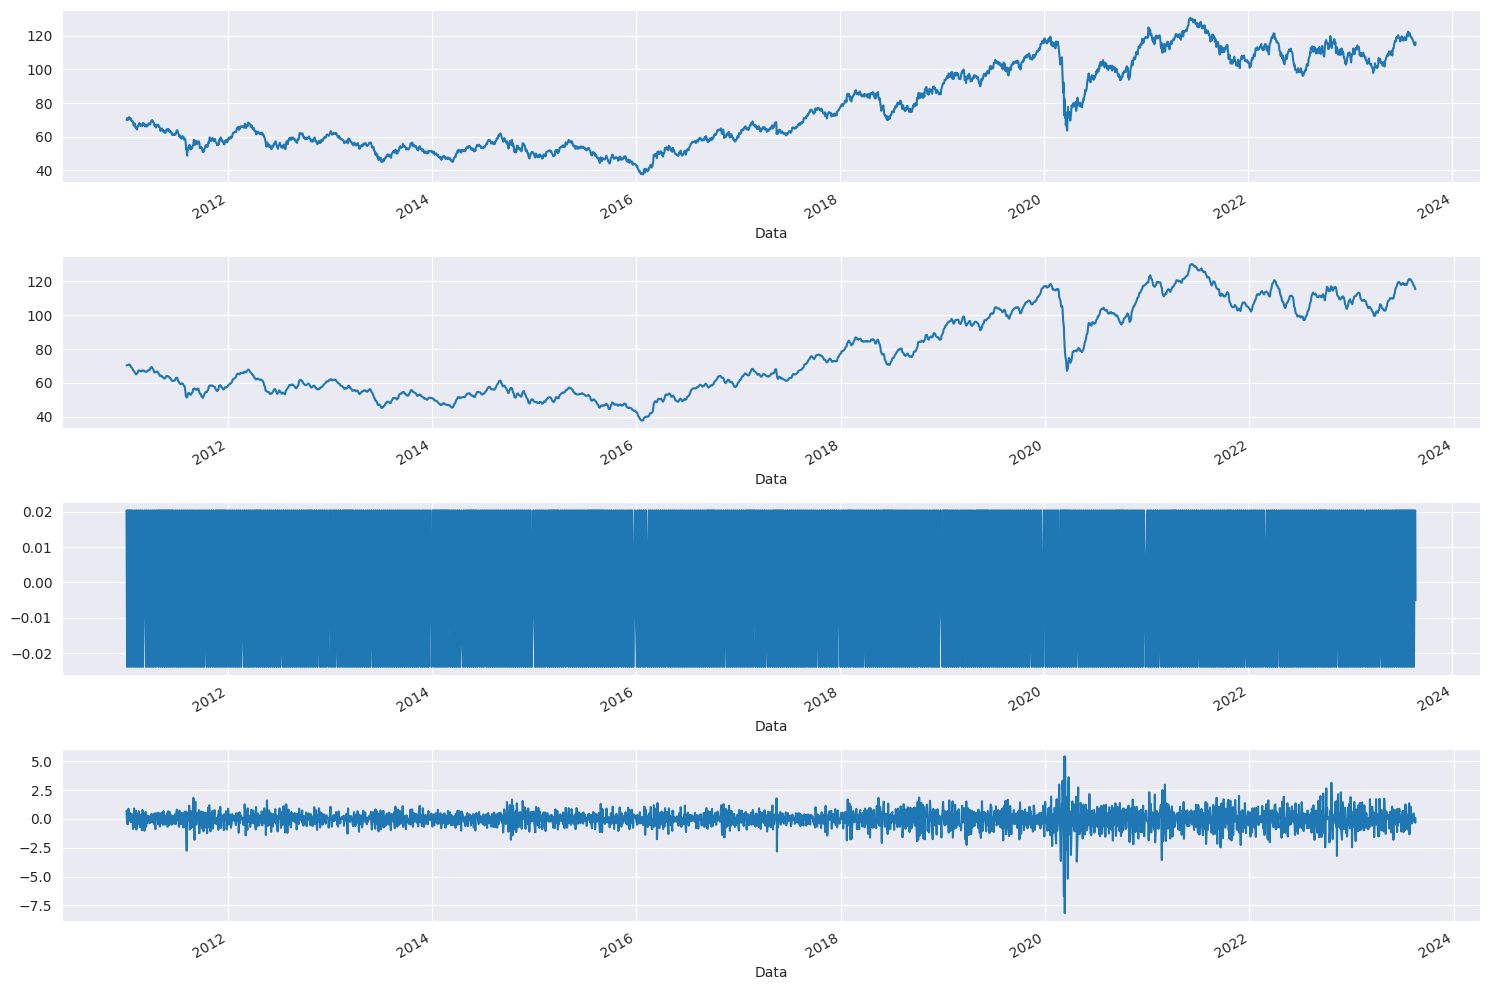

In [367]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2) # tendência dos dados ao longo do tempo
resultados.seasonal.plot(ax=ax3) # sazonalidade / recorrencia dos dados
resultados.resid.plot(ax=ax4) # residuos que não necessariamente fazem sentido - IMPORTANTE AVALIAR

plt.tight_layout()
plt.show()

> **Inferências iniciais dos gráficos**:

* Pelas análises de obsevração e tendência, temos um comportamento de crescimento ao longo dos anos, indicando que há um aumento no volume das cotações em relação à cotação no momento do fechamento.


* Analisando os dados de sazonalidade desde 2010, não é possível avaliar se há uma sazonalidade no comportamento dos dados. Vamos reduzir o tempo para ter uma avaliação melhor da situação.

### Seasonal decompose a partir de 2022

In [ ]:
dados_decompose_2 = ibovespa_pos_2010.loc[ibovespa_pos_2010.index.year > 2021]
dados_decompose_2 = dados_decompose_2[['Último']]
dados_decompose_2 = dados_decompose_2.dropna()
dados_decompose_2 = dados_decompose_2.sort_index()


resultados_2 = seasonal_decompose(dados_decompose_2, period=5)

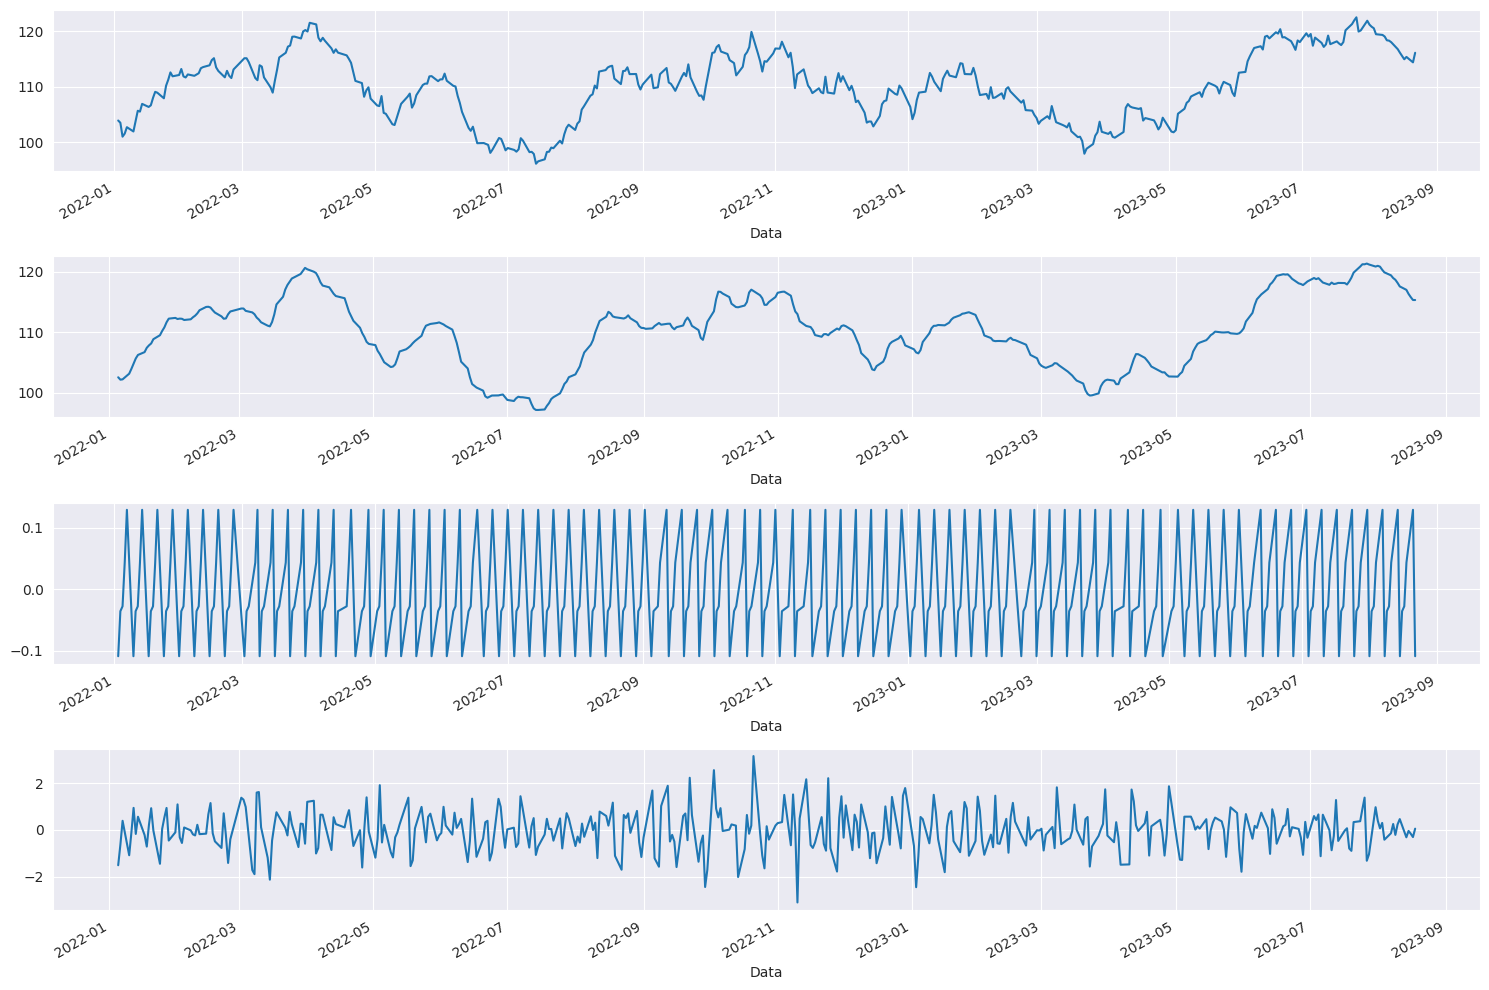

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,10))

resultados_2.observed.plot(ax=ax1)
resultados_2.trend.plot(ax=ax2) # tendência dos dados ao longo do tempo
resultados_2.seasonal.plot(ax=ax3) # sazonalidade / recorrencia dos dados
resultados_2.resid.plot(ax=ax4) # residuos que não necessariamente fazem sentido - IMPORTANTE AVALIAR

plt.tight_layout()
plt.show()

> **Inferências pós-redução do tempo de análise**:

* Agora, vemos tanto nas observações quando na sazonalidade uma tendência de oscilaçoes constantes, indicando que nos últimos 2 anos há sim uma sazonalidade.


* Podemos também inferir inicialemnte que esses dados são estacionários, indicando, com base na tendência do gráfico 2 da tabela acima.

## Análise do AdFuller

In [310]:
from statsmodels.tsa.stattools import adfuller

## Avaliação considerando base pós 2010

In [311]:
dados_decompose.head()

,Último
Data,
2011-01-03,69.962
2011-01-04,70.318
2011-01-05,71.091
2011-01-06,70.579
2011-01-07,70.057


In [369]:
X_2010 = dados_decompose.Último.values  # transformação dos dados em variável

# configuração do teste
result_2010 = adfuller(X_2010)

alpha = 0.05

# print das métricas do teste
print("Teste ADF - Dados pós 2011")
print(f"Teste Estatístico: {result_2010[0]}")
print(f"P-Value: {result_2010[1]}")
print("Valores críticos:")

for key, value in result_2010[4].items():
  print(f"\t{key}: {value}")


print("Avaliação do p-value")
if result_2010[1] >= alpha:
  print(f"\tEstatisticamente, não podemos rejeitar a hipótese nula - Série Não Estacionária")
else:
  print(f"\tRejeitar a hipótese nula - Série Estacionária.")


Teste ADF - Dados pós 2011
Teste Estatístico: -0.9294690848934833
P-Value: 0.7781130066362649
Valores críticos:
	1%: -3.4324449684310445
	5%: -2.8624656272139637
	10%: -2.5672627334083655
Avaliação do p-value
	Estatisticamente, não podemos rejeitar a hipótese nula - Série Não Estacionária


## Avaliação com dados pós 2022

In [368]:
X_2022 = dados_decompose_2.Último.values  # transformação dos dados em variável

# configuração do teste
result_2022 = adfuller(X_2022)

alpha = 0.05

# print das métricas do teste
print("Teste ADF - Dados pós 2022")
print(f"Teste Estatístico: {result_2022[0]}")
print(f"P-Value: {result_2022[1]}")
print("Valores críticos:")

for key, value in result_2022[4].items():
  print(f"\t{key}: {value}")


print("Avaliação do p-value")
if result_2022[1] >= alpha:
  print(f"\tEstatisticamente, não podemos rejeitar a hipótese nula - Série Não Estacionária")
else:
  print(f"\tRejeitar a hipótese nula - Série Estacionária.")

Teste ADF - Dados pós 2022
Teste Estatístico: -2.5312262750606433
P-Value: 0.10806029484343327
Valores críticos:
	1%: -3.4464400156784927
	5%: -2.868632644097719
	10%: -2.5705481612974577
Avaliação do p-value
	Estatisticamente, não podemos rejeitar a hipótese nula - Série Não Estacionária


## Construção do modelo com prophet

### Modelo sem transformar os dados

In [537]:
!pip install prophet pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218908 sha256=e8b428485cd261573feb3c213b42b3f473bc86fa968f58c87c58dec488c0245c
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [541]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go
import pandas_ta as ta

In [558]:
# configuração do df para modelo (usando todos os dados a partir de 2022)
dados_modelo = dados_decompose_2.reset_index()
dados_modelo = dados_modelo.rename(columns={"Data": "ds", "Último": "y"})
dados_modelo.ta.ema(close='y', length=21, append=True)
dados_modelo.dropna(inplace=True)
dados_modelo.head()

,ds,y,EMA_21
20,2022-01-31,112.144,106.751667
21,2022-02-01,113.228,107.340424
22,2022-02-02,111.894,107.754386
23,2022-02-03,111.696,108.112714
24,2022-02-04,112.245,108.488377


In [550]:
dados_modelo.shape

(391, 3)

In [559]:
# configuração do modelo e fit dos dados de treino
model = Prophet(daily_seasonality=True)
model.fit(dados_modelo)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsmodubkr/ld2c5l2q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsmodubkr/w9k3c2wg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93853', 'data', 'file=/tmp/tmpsmodubkr/ld2c5l2q.json', 'init=/tmp/tmpsmodubkr/w9k3c2wg.json', 'output', 'file=/tmp/tmpsmodubkr/prophet_modelueyw_zt9/prophet_model-20230828222008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:20:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:20:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [560]:
future = model.make_future_dataframe(periods=30)
# future['day'] =  future['ds'].dt.weekday
# future = future[future['day'] <=4] #retirando final de semana da previsão
forecast = model.predict(future) #

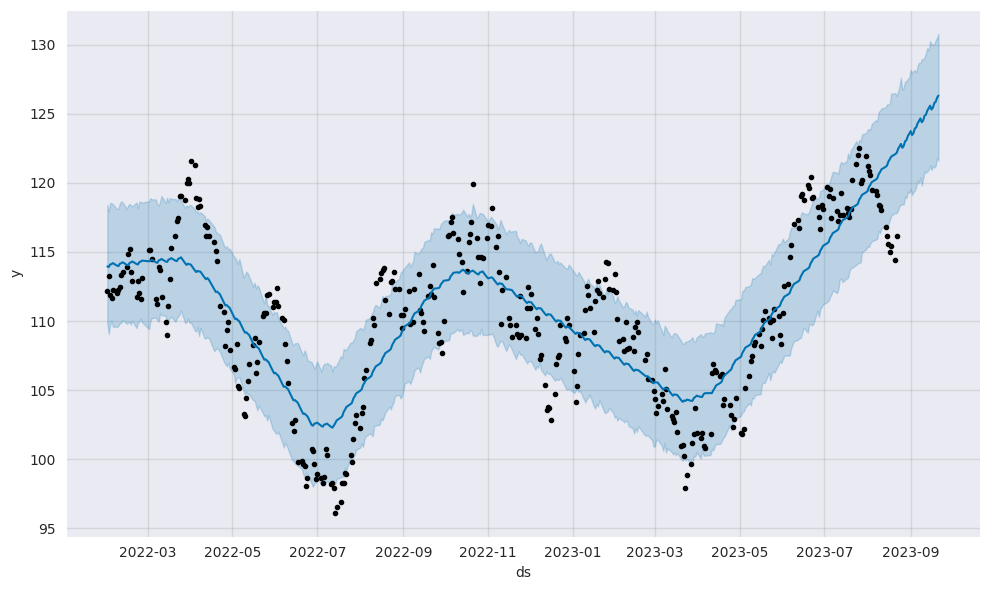

In [561]:
# criando a visualização
model.plot(forecast)
plt.show()

In [563]:
dados_modelo

,ds,y,EMA_21
20,2022-01-31,112.144,106.751667
21,2022-02-01,113.228,107.340424
22,2022-02-02,111.894,107.754386
23,2022-02-03,111.696,108.112714
24,2022-02-04,112.245,108.488377
...,...,...,...
406,2023-08-16,115.592,118.530090
407,2023-08-17,114.982,118.207536
408,2023-08-18,115.409,117.953124
409,2023-08-21,114.429,117.632749


In [564]:
# Plot linear regression result
fig = go.Figure([
    go.Scatter(x=dados_modelo['ds'], y=dados_modelo['y'], name='Actual', mode='lines'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted', mode='lines'),
    go.Scatter(x=forecast['ds'], y=dados_modelo['EMA_21'], name='EMA', mode='lines')
])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1d", step="day", stepmode="backward"),
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [565]:
uniao_dados = forecast.set_index('ds')[['yhat']].join(dados_modelo.set_index('ds').y).reset_index().dropna()
uniao_dados

,ds,yhat,y
0,2022-01-31,113.950245,112.144
1,2022-02-01,113.916049,113.228
2,2022-02-02,114.086276,111.894
3,2022-02-03,114.126386,111.696
4,2022-02-04,114.194155,112.245
...,...,...,...
386,2023-08-16,121.547742,115.592
387,2023-08-17,121.711057,114.982
388,2023-08-18,121.902033,115.409
389,2023-08-21,122.087568,114.429


In [566]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [569]:
wmape_forecast_v1 = wmape(uniao_dados['y'].values, uniao_dados['yhat'].values)
print(f'{wmape_forecast_v1:.2%}')

2.53%


## Validação com demais dados

In [575]:
# configuração do df para modelo (usando todos os dados a partir de 2022)
dados_modelo_v2 = dados_decompose.reset_index()
dados_modelo_v2 = dados_modelo_v2.rename(columns={"Data": "ds", "Último": "y"})
dados_modelo_v2.ta.ema(close='y', length=21, append=True)
dados_modelo_v2.dropna(inplace=True)
dados_modelo_v2.head()

,ds,y,EMA_21
20,2011-02-01,67.847,69.687619
21,2011-02-02,66.688,69.414926
22,2011-02-03,66.765,69.174024
23,2011-02-04,65.269,68.819022
24,2011-02-07,65.362,68.504747


DEBUG:cmdstanpy:input tempfile: /tmp/tmpsmodubkr/lv81i3of.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsmodubkr/k5_3eyh2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76058', 'data', 'file=/tmp/tmpsmodubkr/lv81i3of.json', 'init=/tmp/tmpsmodubkr/k5_3eyh2.json', 'output', 'file=/tmp/tmpsmodubkr/prophet_modelzr2u27cl/prophet_model-20230828223230.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:32:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:32:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


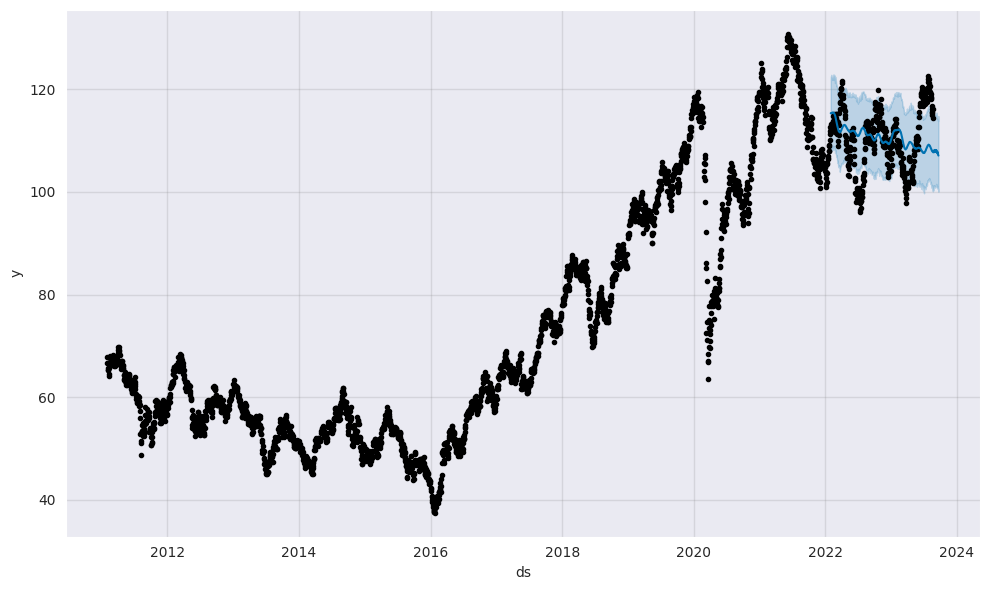

In [576]:
# # configuração do modelo e fit dos dados de treino
# model_2 = Prophet(daily_seasonality=True)
# model_2.fit(dados_modelo_v2)


# future_2 = model_2.make_future_dataframe(periods=30)
# forecast_2 = model_2.predict(future)
# model_2.plot(forecast_2)
# plt.show()

In [577]:
# uniao_dados_2 = forecast_2.set_index('ds')[['yhat']].join(dados_modelo_v2.set_index('ds').y).reset_index().dropna()
# uniao_dados_2

,ds,yhat,y
0,2022-01-31,115.331383,112.144
1,2022-02-01,115.312935,113.228
2,2022-02-02,115.320050,111.894
3,2022-02-03,115.324365,111.696
4,2022-02-04,115.388276,112.245
...,...,...,...
386,2023-08-16,108.016620,115.592
387,2023-08-17,107.949707,114.982
388,2023-08-18,107.947007,115.409
389,2023-08-21,107.791579,114.429


In [433]:
# # definição de dados treino e validação
# treino = dados_modelo.loc[dados_modelo['ds'] < '2023-05-22']
# valid = dados_modelo.loc[(dados_modelo['ds'] >= '2023-05-22') & (dados_modelo['ds'] < '2023-08-22')]
# h = valid["ds"].nunique() # horizonte: tempo que será projetado


# # forecast = forecast.merge(valid, on=['ds'], how='left')
# forecast['ds'] = forecast['ds'].sort_values()
# # forecast.dropna(inplace=True)
# # forecast.fillna(0, inplace=True)
# forecast.head()


# future = model.make_future_dataframe(periods=30)
# future['day'] =  future['ds'].dt.weekday
# future = future[future['day'] <=4] #retirando final de semana da previsão
# forecast = model.predict(future) #



In [480]:
# Get all predictions
pred_df = forecast[forecast['ds'] > datetime.today()][['ds','yhat']]

# Reset Index
pred_df.reset_index(inplace=True)

# Drop index column
pred_df.drop(labels='index', axis=1,inplace=True)

# Rename columns
pred_df.rename(columns={'ds': 'date', 'yhat': 'predicted price'}, inplace=True)

# Show first elements
pred_df

,date,predicted price
0,2023-08-29,123.279157
1,2023-08-30,123.587036
2,2023-08-31,123.773182
3,2023-09-01,123.980745
4,2023-09-04,124.094178
5,2023-09-05,124.222811
6,2023-09-06,124.530690
7,2023-09-07,124.716836
8,2023-09-08,124.924399
9,2023-09-11,125.037832


In [486]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

In [ ]:
# execute cross validation

# reference
# https://facebook.github.io/prophet/docs/diagnostics.html#:~:text=Cross%20validation,up%20to%20that%20cutoff%20point.

df_cv = cross_validation(model, initial='411 days', period='7 days', horizon = '90 days')

# visualize data
print(df_cv.head())

# measure performance
df_p = performance_metrics(df_cv)

In [489]:
print(df_p.head())

  horizon        mse      rmse       mae      mape     mdape     smape  \
0  9 days  23.530810  4.850857  4.227164  0.039879  0.039867  0.040269   
1 12 days  25.782682  5.077665  4.436576  0.041782  0.040639  0.042261   
2 13 days  27.562001  5.249953  4.566858  0.042922  0.041352  0.043477   
3 14 days  29.749837  5.454341  4.707730  0.044155  0.042093  0.044781   
4 15 days  31.770321  5.636517  4.873984  0.045711  0.041918  0.046369   

   coverage  
0  0.463866  
1  0.429412  
2  0.398190  
3  0.379832  
4  0.389916  


AVALIAÇÃO DO WMAPE

In [520]:
# definição de dados treino e validação
treino = dados_modelo.loc[dados_modelo['ds'] < '2023-05-22']
valid = dados_modelo.loc[(dados_modelo['ds'] >= '2023-05-22') & (dados_modelo['ds'] < '2023-08-22')]
h = valid["ds"].nunique() # horizonte: tempo que será projetado

In [521]:
h

65

In [522]:
# configuração do modelo e fit dos dados de treino
model = Prophet()
model.fit(dados_modelo)

future = model.make_future_dataframe(periods=65)
# future['day'] =  future['ds'].dt.weekday
# future = future[future['day'] <=4] #retirando final de semana da previsão
forecast = model.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsmodubkr/zjesisde.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsmodubkr/ofdz40cd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93752', 'data', 'file=/tmp/tmpsmodubkr/zjesisde.json', 'init=/tmp/tmpsmodubkr/ofdz40cd.json', 'output', 'file=/tmp/tmpsmodubkr/prophet_model8xsbrztn/prophet_model-20230828220608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


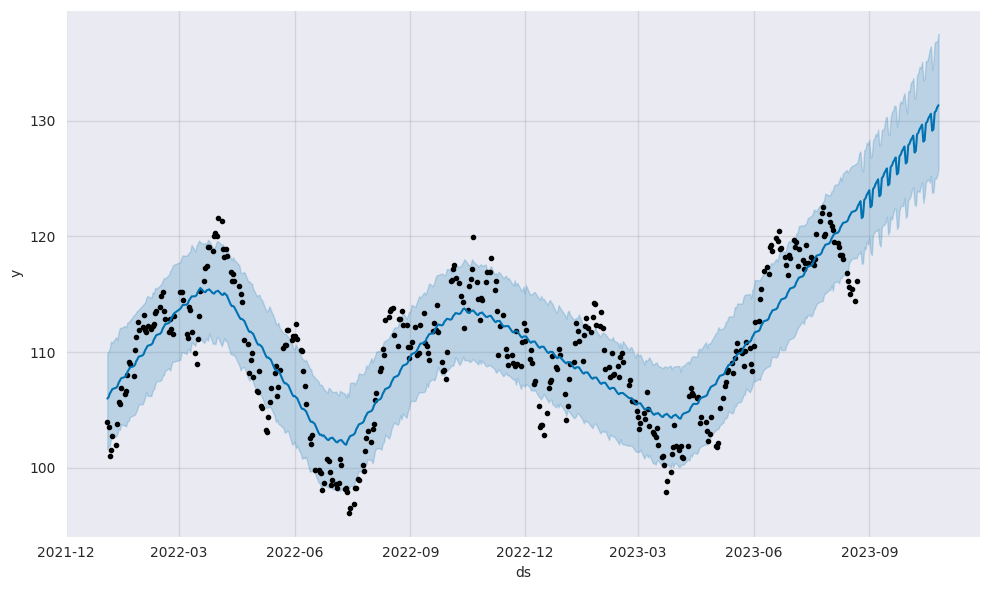

In [523]:
# criando a visualização
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
model.plot(forecast)
plt.show()

In [524]:
forecast_prophet = forecast.merge(valid, on=['ds'], how='left').dropna()

In [525]:
metric_df = forecast.set_index('ds')[['yhat']].join(dados_modelo.set_index('ds').y).reset_index().dropna()
metric_df

,ds,yhat,y
0,2022-01-03,105.983500,103.922
1,2022-01-04,106.110619,103.514
2,2022-01-05,106.416986,101.006
3,2022-01-06,106.601619,101.561
4,2022-01-07,106.807669,102.719
...,...,...,...
406,2023-08-16,121.699727,115.592
407,2023-08-17,121.885874,114.982
408,2023-08-18,122.093437,115.409
409,2023-08-21,122.206870,114.429


In [526]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

In [528]:
wmape_forecast = wmape(metric_df['y'].values, metric_df['yhat'].values)
print(f'{wped_forecast:.2%}')

2.48%


In [519]:
# Acessar predições do modelo
pred_df = forecast[(forecast['ds'] >= '2023-05-22') & (dados_modelo['ds'] < '2023-08-22')][['ds','yhat']]

# ajustar dataframe
pred_df.reset_index(inplace=True)
pred_df.drop(labels='index', axis=1,inplace=True)
pred_df.rename(columns={'ds': 'ds', 'yhat': 'y_pred'}, inplace=True)
pred_df.head()

,ds,y_pred
0,2023-05-22,109.939367
1,2023-05-23,110.067999
2,2023-05-24,110.375878
3,2023-05-25,110.562024
4,2023-05-26,110.769588


In [513]:
validacao = pred_df.merge(valid, on=['ds'], how='left')
validacao

,ds,y_pred,y
0,2023-05-22,109.939367,110.213
1,2023-05-23,110.067999,109.929
2,2023-05-24,110.375878,108.800
3,2023-05-25,110.562024,110.054
4,2023-05-26,110.769588,110.906
...,...,...,...
60,2023-08-15,121.391848,116.171
61,2023-08-16,121.699727,115.592
62,2023-08-17,121.885874,114.982
63,2023-08-18,122.093437,115.409


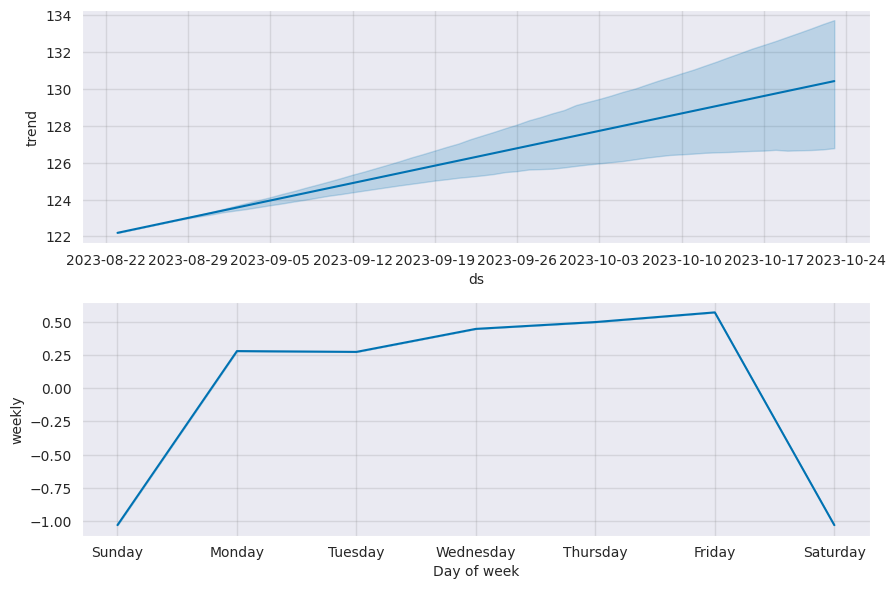

In [264]:
model.plot_components(previsao)
plt.show()

Novos gráficos

In [267]:
plot_plotly(model,previsao)

Prophet com sazonalidade diária

In [ ]:
# configuração do modelo e fit dos dados de treino
model = Prophet(daily_seasonality=True)
model.fit(dados_modelo)

## Modelo com transformação dos dados

Aproximação com log

In [241]:
dados_modelo_2 = dados_decompose_2.reset_index()
dados_modelo_2['unique_id'] = 'Ibovespa'
dados_modelo_2 = dados_modelo_2.rename(columns={"Data": "ds", "Último": "y"})
dados_modelo_2

,ds,y,unique_id
0,2022-01-03,103.922,Ibovespa
1,2022-01-04,103.514,Ibovespa
2,2022-01-05,101.006,Ibovespa
3,2022-01-06,101.561,Ibovespa
4,2022-01-07,102.719,Ibovespa
...,...,...,...
406,2023-08-16,115.592,Ibovespa
407,2023-08-17,114.982,Ibovespa
408,2023-08-18,115.409,Ibovespa
409,2023-08-21,114.429,Ibovespa


In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

TypeError: ignored